Data description: 
Players data set
    -number of observations: 194 -> total number of 
    unique players
    
    -variables: 8-> experience, subscribe, hashed email 
    (player id), played hours, name, gender, age
    
        -experience: category, 
        
        -subscribe: logical (true or false), whether 
        the player is subscribed to the newsletter
        
        -hashedEmail: category, unique identification 
        of each player
        
        -played hours: numerical, number of hours 
        played in total
        
        -name: category, the player's name
        
        -gender: category, the player's gender
        
        -age: numerical, the player's age
        
problems in data: the data is not standardized, so the played hours would be weighed more when doing modelling.

Sessions data set
    -number of observations: 1533 -> total number of 
    played sessions
    
    -variables: 5-> hashed email, start time, end time, 
    original start time, original end time
    
    -hashedEmail: category, unique identification 
        of each player
        
    -start time: category, start time of a session 
        (date and time)
        
    -end time: category, end time of a session 
        (date and time)
        
    -original start time: numerical, time from 
        when the server was first made in milliseconds 
        (from Jan 1 1970)
        
    -original end time: like the start time
    
Problems in data: the data is not tidy, the start and end times must be separated to their respective dates and times.
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?


Specific question: Can  experience, played hours, gender and age help predict newsletter subscription in players.csv data set?


response variable: newsletter subscription
explanatory variable: experience, played hours, age, gender


The players.csv would be most useful to me to investigate this question. This is because the dataset contains the player's subscription status and other variable that might correlate to this, like age, experience of hours played. Experience can show if most experienced players are more likely to subscribed as they're more engaged. Played hours does a similar thing to experience. Gender can reveal if there is any significant differences in subscription rate between males and females. Age can reveal if a certain age group is more likely to subscribe. The player's name and their ID do not serve much purpose for this question.


Data wrangling plan: There are comments throughout the code for more specific guide throughs, but the general plan is to load the dataset onto the note book, then making sure each row is and observation, each column is a variable, and each cell is one value. Then make visualizations: scatterplot to show relationship between hours played and age. bar charts to show subscription across the different categories.




In [2]:
library(tidyverse) #this is done so we can access all the functions

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
players_url <- "https://raw.githubusercontent.com/JasmineSun06/individual_project_planning/refs/heads/main/players.csv"
sessions_url <- "https://raw.githubusercontent.com/JasmineSun06/individual_project_planning/refs/heads/main/sessions.csv"
#Since the data sets are not on jupyter notebook, I used Github to find the raw data url, then named the urls accordingly.


players_data <- read_csv(players_url)
sessions_data <- read_csv(sessions_url)
#Since they are .csv, I just did read_csv to the url

head(players_data)
head(sessions_data)
#to look at the first 6 rows so it is easier to see

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [4]:
#to find number of observations in players_data
nrow(players_data)
#to find number of observations in sessions_data
nrow(sessions_data)

[1] 196

[1] 1535

In [5]:
#Now that the data is loaded onto the notebook, it must be wrangled.
players_data <- players_data |>
   
    drop_na()

sessions_data <- sessions_data |>
    
    drop_na() 
   

#this is done to get rid of any NAs if there are any.
head(players_data)
head(sessions_data)


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [9]:
#to tidy sessions_data, split the start and end time into their dates and times
sessions_separate <- sessions_data |>
    separate(col = start_time, into = c("start_date", "start_time_hm"), sep = " ") |>

    separate(col = end_time, c("end_date", "end_time_hm"), sep = " ")

#split the columns into their respective dates and the time (hour:minute)
head(sessions_separate)

hashedEmail,start_date,start_time_hm,end_date,end_time_hm,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


In [12]:
#players_data seems to be tidy, so the mean values of the quantative variables will be found
#this will be done using summarize as not all the columns are quantative, so we can't use map_df

players_mean <- players_data |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE),
            mean_age = mean(Age, na.rm = TRUE))

players_mean
#the average hours played in total is ~6hrr
#the avergae age is ~21 years old

mean_played_hours,mean_age
<dbl>,<dbl>
5.904639,20.52062


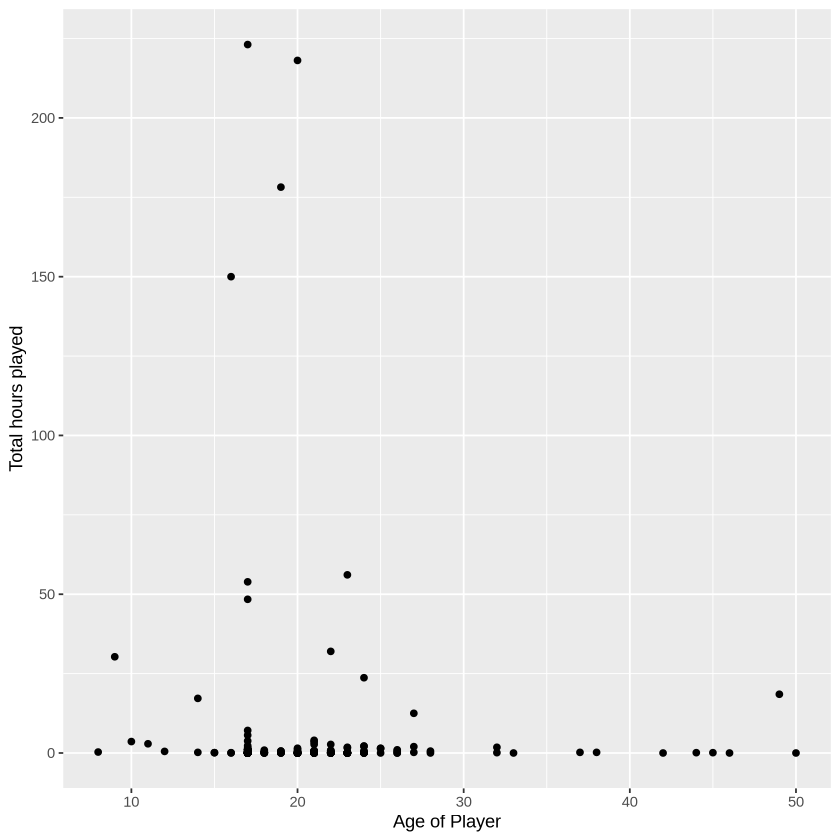

In [18]:
#making the visualizations
#graph for age vs. hours played
age_vs_hours_played_plot <- players_data |> 
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() + 
    labs(tittle = "Age vs. Total hours played", x = "Age of Player", y = "Total hours played")

age_vs_hours_played_plot

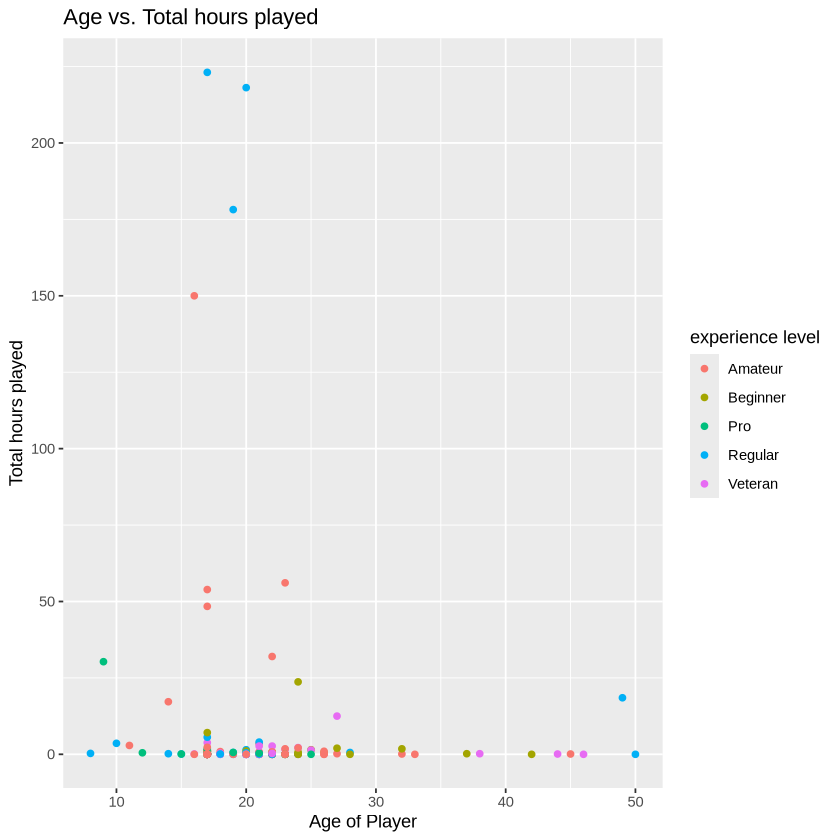

In [21]:
age_vs_hours_played_plot <- players_data |> 
    ggplot(aes(x = Age, y = played_hours, colour = experience)) +
    geom_point() + 
    labs(title = "Age vs. Total hours played", x = "Age of Player", y = "Total hours played", colour = "experience level")

age_vs_hours_played_plot

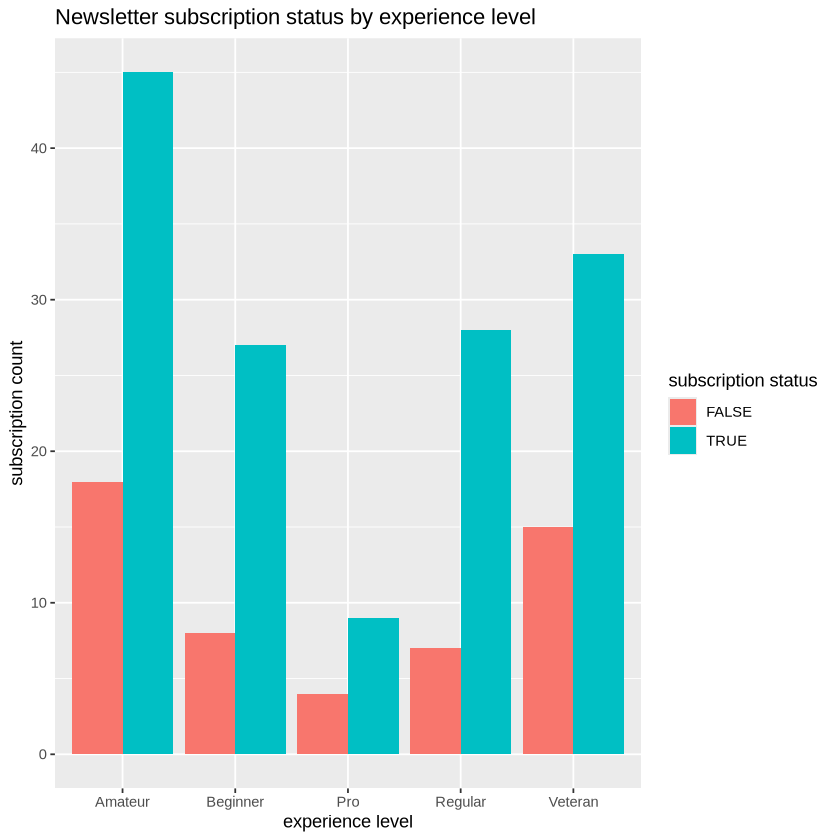

In [26]:
#experience vs. newsletter subscription as bar graph
experience_vs_subscription_bar <- players_data |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Newsletter subscription status by experience level", x = "experience level", y = "subscription count", fill = "subscription status")
experience_vs_subscription_bar

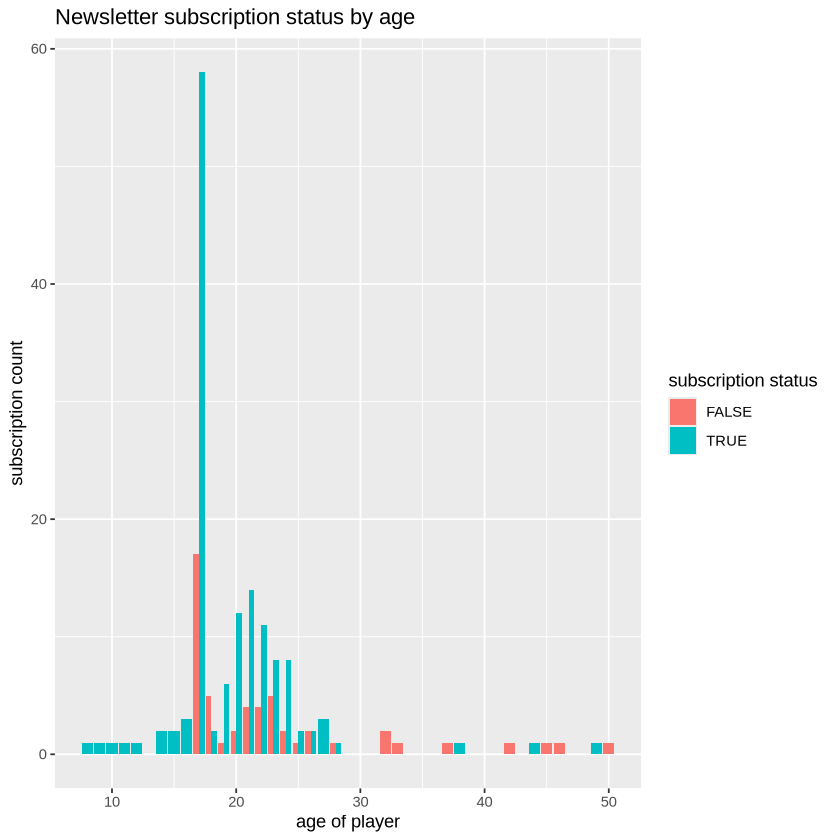

In [29]:
#age vs. newsletter subscription as bar graph
age_vs_subscription_bar <- players_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Newsletter subscription status by age", x = "age of player", y = "subscription count", fill = "subscription status")
age_vs_subscription_bar

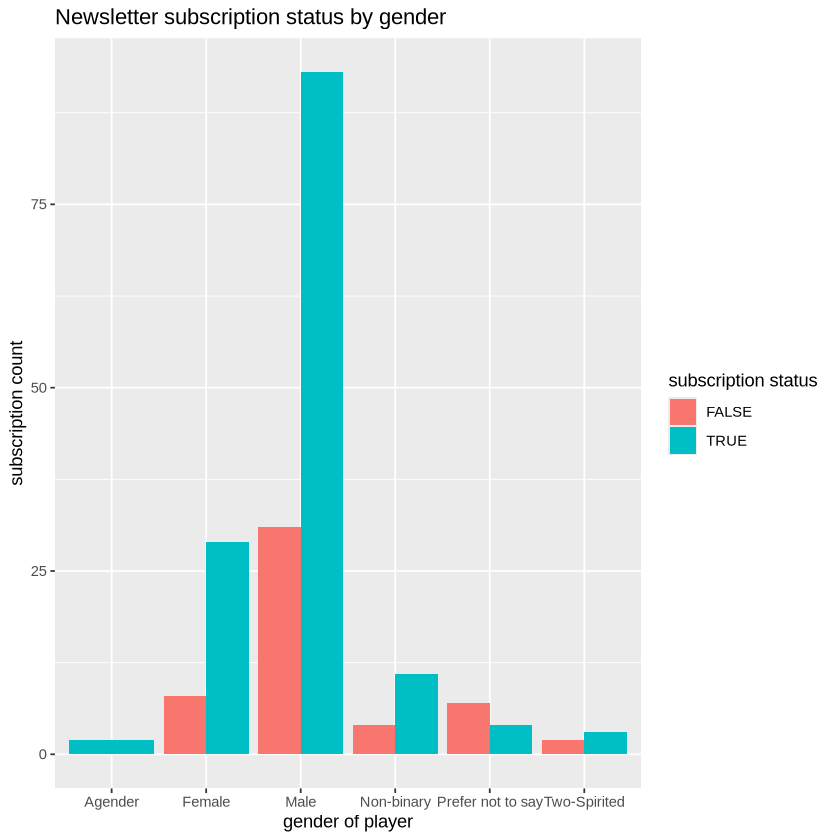

In [30]:
#gender vs. newsletter subscription as bar graph
gender_vs_subscription_bar <- players_data |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(position = "dodge") +
    labs(title = "Newsletter subscription status by gender", x = "gender of player", y = "subscription count", fill = "subscription status")
gender_vs_subscription_bar